# datetime

pandas.to_datetime(arg):

arg : integer, float, string, datetime, list, tuple, 1-d array, Series

In [82]:
import pandas as pd

In [83]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [84]:
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00


In [30]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [31]:
ufo.Time.str[-5:-3].astype(int).head(2)

0    22
1    20
Name: Time, dtype: int32

In [32]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [33]:
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00


In [35]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [38]:
ufo.Time.dt.hour.head(2)

0    22
1    20
Name: Time, dtype: int64

In [40]:
ufo.Time.dt.weekday_name.head(2)

0    Sunday
1    Monday
Name: Time, dtype: object

In [43]:
ufo.Time.dt.weekday.head(2)

0    6
1    0
Name: Time, dtype: int64

In [45]:
ufo.Time.dt.dayofyear.head(2)

0    152
1    181
Name: Time, dtype: int64

In [63]:
ts = pd.to_datetime('1/1/1999');ts

Timestamp('1999-01-01 00:00:00')

In [67]:
ufo.loc[ufo.Time >= ts, :].head(2)

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00


In [68]:
ufo.Time.max()

Timestamp('2000-12-31 23:59:00')

In [69]:
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [70]:
(ufo.Time.max() - ufo.Time.min()).days

25781

In [72]:
ufo['Year'] = ufo.Time.dt.year

In [73]:
ufo.head(2)

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930


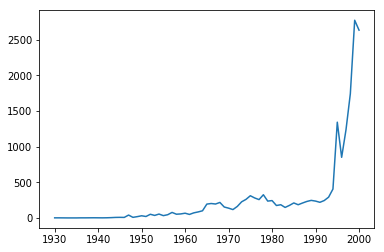

In [81]:
%matplotlib inline
ufo['Year'].value_counts().sort_index().plot();

# DatetimeIndex

In [90]:
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

In [112]:
def SPY_return(start, end):
    df = get_prices_data( [{'q': ".INX", 'x': "INDEXSP",}], "20Y")
    df.index = pd.to_datetime(df.index)
    df = pd.DataFrame(df['.INX_Close'].loc[start:end])
    df.rename(columns={".INX_Close":"SPY"}, inplace = True)
    return df

start = pd.to_datetime('2008-01-01')
end = pd.to_datetime('2017-12-31')     # Be cautious
df = SPY_return(start, end)
df.head(2)

,SPY
2008-01-01,1468.36
2008-01-03,1447.16


In [113]:
df['2014-01'].head(2)

,SPY
2014-01-01,1848.36
2014-01-03,1831.98


In [114]:
df['2012-01-10':'2012-01-12']

,SPY
2012-01-10,1280.70
2012-01-11,1292.08
2012-01-12,1292.48


In [115]:
df['2014-10'].SPY.mean()

1935.2847826086959

In [116]:
df['2014-10'].SPY.max()

1994.6500000000001

# resample

In [117]:
df.SPY.resample('M').mean().head()

2008-01-31    1383.040476
2008-02-29    1357.268500
2008-03-31    1317.339500
2008-04-30    1367.610455
2008-05-31    1402.416364
Freq: M, Name: SPY, dtype: float64

In [118]:
df.SPY.resample('W').mean().head()

2008-01-06    1443.5775
2008-01-13    1407.3700
2008-01-20    1365.7680
2008-01-27    1332.9450
2008-02-03    1369.2080
Freq: W-SUN, Name: SPY, dtype: float64

In [119]:
%matplotlib inline

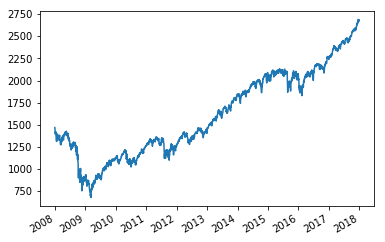

In [120]:
df.SPY.plot();

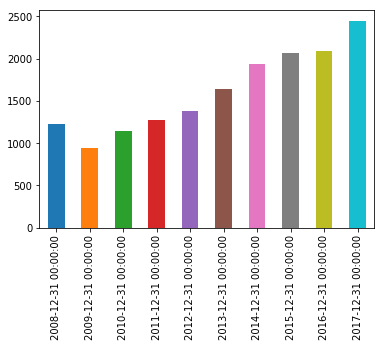

In [123]:
df['SPY'].resample('Y').mean().plot(kind='bar');

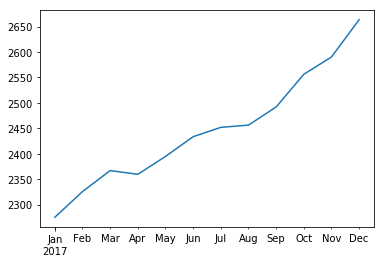

In [128]:
df['2017'].SPY.resample('M').mean().plot();